In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df= pd.read_csv("^NSEI.csv")

In [4]:
df.tail()

Date          Open          High           Low         Close  \
3066  2020-02-20  12119.000000  12152.000000  12071.450195  12080.849609   
3067  2020-02-24  12012.549805  12012.549805  11813.400391  11829.400391   
3068  2020-02-25  11877.500000  11883.049805  11779.900391  11797.900391   
3069  2020-02-26  11738.549805  11783.250000  11639.599609  11678.500000   
3070  2020-02-27  11661.250000  11663.849609  11536.700195  11633.299805   

         Adj Close    Volume  
3066  12080.849609  502600.0  
3067  11829.400391  490800.0  
3068  11797.900391  461000.0  
3069  11678.500000  567600.0  
3070  11633.299805  608600.0

In [5]:
df.shape

(3071, 7)

In [6]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [7]:
df.tail()

index        Date          Open          High           Low  \
3034   3066  2020-02-20  12119.000000  12152.000000  12071.450195   
3035   3067  2020-02-24  12012.549805  12012.549805  11813.400391   
3036   3068  2020-02-25  11877.500000  11883.049805  11779.900391   
3037   3069  2020-02-26  11738.549805  11783.250000  11639.599609   
3038   3070  2020-02-27  11661.250000  11663.849609  11536.700195   

             Close     Adj Close    Volume  
3034  12080.849609  12080.849609  502600.0  
3035  11829.400391  11829.400391  490800.0  
3036  11797.900391  11797.900391  461000.0  
3037  11678.500000  11678.500000  567600.0  
3038  11633.299805  11633.299805  608600.0

In [8]:
def ComputeEWMA(data, alpha=0.6):
    """Computes Exponentially Weighted Moving Average
    """
    EWMA = [0]*len(data)
    EWMA[0] = data[0]
    for i in range(1,len(data)):
        EWMA[i] = alpha*data[i] + (1-alpha)*EWMA[i-1]
    return EWMA

In [9]:
def ComputeOBV(close,volume):
    """Computes On Balance Volume"""
    OBV = [0]*len(close)
    OBV[0] = volume[0]
    for i in range(1,len(close)):
        if (close[i] > close[i-1]):
            OBV[i] = OBV[i-1] + volume[i]
        elif (close[i] < close[i-1]):
            OBV[i] = OBV[i-1] - volume[i]
        elif (close[i] == close[i-1]):
            OBV[i] = OBV[i-1]
    return OBV

In [10]:
def ComputeRSI(close):
    """Computes RSI Indicator"""
    
    U = [0]*len(close)
    D = [0]*len(close)    
    U_mean = [0]*len(close)
    D_mean = [0]*len(close)
    U_mean2 = [0]*len(close)
    D_mean2 = [0]*len(close)
    RS = [0]*len(close)
    RSI = [0]*len(close)
    
    for i in range(1,len(close)):
        if(close[i] > close[i-1]):
            U[i] = (close[i]-close[i-1])
        elif(close[i] < close[i-1]):
            D[i] = (close[i-1]-close[i])
    
    #U = [0]*len(close)       
    #U[1:len(close)] = [(close[i]-close[i-1]) for i in range(1,len(close)) if(close[i] > close[i-1])]
    #D = [(close[i-1]-close[i]) for i in range(1,len(close)) if(close[i] < close[i-1])]
    #print(len(U))
    #print(len(D)) 
    
    U_mean = pd.Series(U).rolling(14).mean()
    D_mean = pd.Series(D).rolling(14).mean()
    
    U_mean2[1:len(close)] = [(U_mean[i-1]*13 + U_mean[i])/14 for i in range(1,len(close))]
    D_mean2[1:len(close)] = [(D_mean[i-1]*13 + D_mean[i])/14 for i in range(1,len(close))]
    
    RS[1:len(close)] = [U_mean2[i]/D_mean2[i] for i in range(1,len(close))]
    RSI = [100 - (100/(1+RS[i])) for i in range(0,len(close))]
    
    return RSI

Text(0.5,1,'Close')

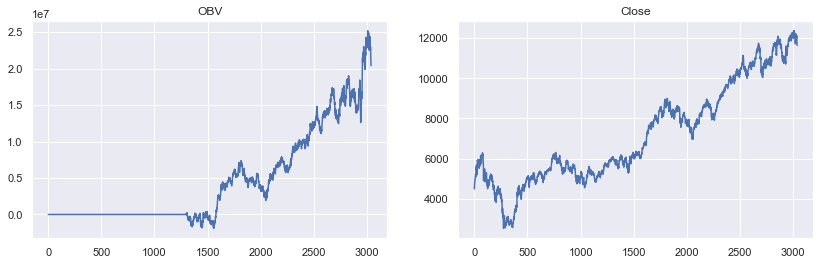

In [11]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,4))

ax[0].plot(ComputeOBV(df['Close'],df['Volume']))
ax[0].set_title('OBV')

ax[1].plot(df['Close'])
ax[1].set_title('Close')

In [12]:
df.drop(['Adj Close'],axis=1,inplace=True)
df['EWMA']=ComputeEWMA(df['Close'],0.6)
df['MA3'] = df['Close'].rolling(3).mean()
df['OBV'] = ComputeOBV(df['Close'],df['Volume'])
df['Return'] = df['Close']/df['Close'].shift(1)-1
df['EWMARet'] = df['EWMA']/df['EWMA'].shift(1)-1
df['MA3Ret'] = df['MA3']/df['MA3'].shift(1)-1
df['RSI'] = ComputeRSI(df['Close'])

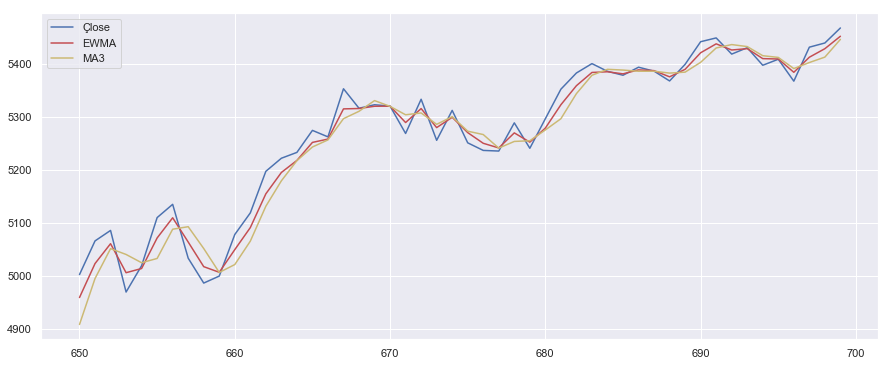

In [13]:
fig = plt.figure(figsize=(15,6))
plt.plot(df['Close'][650:700],label = 'Çlose')
plt.plot(df['EWMA'][650:700],'r')
plt.plot(df['MA3'][650:700],'y')
plt.legend()

In [14]:
df.head()

index        Date         Open         High          Low        Close  \
0      0  2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902   
1      1  2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195   
2      2  2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098   
3      3  2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805   
4      4  2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805   

   Volume         EWMA          MA3  OBV    Return   EWMARet    MA3Ret  RSI  
0     0.0  4494.649902          NaN  0.0       NaN       NaN       NaN  0.0  
1     0.0  4525.580078          NaN  0.0  0.011469  0.006882       NaN  NaN  
2     0.0  4649.642090  4591.066732  0.0  0.040946  0.027414       NaN  NaN  
3     0.0  4708.386719  4675.366699  0.0  0.003212  0.012634  0.018362  NaN  
4     0.0  4785.884571  4772.483236  0.0  0.018957  0.016460  0.020772  NaN

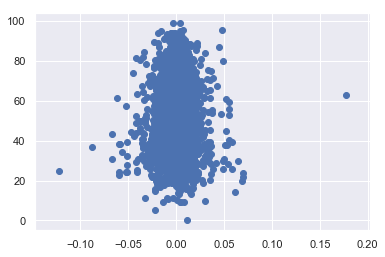

In [15]:
plt.scatter(df['Return'],df['RSI'].shift(1))

In [16]:
data = df[['Date','Close','Return','EWMA','EWMARet','Volume','OBV','RSI']]
data.tail()

Date         Close    Return          EWMA   EWMARet    Volume  \
3034  2020-02-20  12080.849609 -0.003715  12083.218168 -0.000294  502600.0   
3035  2020-02-24  11829.400391 -0.020814  11930.927502 -0.012603  490800.0   
3036  2020-02-25  11797.900391 -0.002663  11851.111235 -0.006690  461000.0   
3037  2020-02-26  11678.500000 -0.010120  11747.544494 -0.008739  567600.0   
3038  2020-02-27  11633.299805 -0.003870  11678.997681 -0.005835  608600.0   

             OBV        RSI  
3034  22522300.0  53.352862  
3035  22031500.0  54.414074  
3036  21570500.0  53.760028  
3037  21002900.0  41.038290  
3038  20394300.0  31.270557

In [17]:
data.head()

Date        Close    Return         EWMA   EWMARet  Volume  OBV  RSI
0  2007-09-17  4494.649902       NaN  4494.649902       NaN     0.0  0.0  0.0
1  2007-09-18  4546.200195  0.011469  4525.580078  0.006882     0.0  0.0  NaN
2  2007-09-19  4732.350098  0.040946  4649.642090  0.027414     0.0  0.0  NaN
3  2007-09-20  4747.549805  0.003212  4708.386719  0.012634     0.0  0.0  NaN
4  2007-09-21  4837.549805  0.018957  4785.884571  0.016460     0.0  0.0  NaN

In [18]:
# Shift the independent vars by +1
# Remove NaN
# Look at linear relationship between dependent and independent
# Check correlation between independent vars
# Scale X so that all vars have same distribution
# Split data in training, CV and test set
# Perform linear reg on training set. Check in CV set

In [19]:
# Shift the independent vars by +1
data.loc[:,['EWMARet','Volume','RSI']]=data.loc[:,['EWMARet','Volume','RSI']].shift(1)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
data.head()

Date        Close    Return         EWMA   EWMARet  Volume  OBV  RSI
0  2007-09-17  4494.649902       NaN  4494.649902       NaN     NaN  0.0  NaN
1  2007-09-18  4546.200195  0.011469  4525.580078       NaN     0.0  0.0  0.0
2  2007-09-19  4732.350098  0.040946  4649.642090  0.006882     0.0  0.0  NaN
3  2007-09-20  4747.549805  0.003212  4708.386719  0.027414     0.0  0.0  NaN
4  2007-09-21  4837.549805  0.018957  4785.884571  0.012634     0.0  0.0  NaN

In [21]:
# Remove NaN
data.dropna(inplace=True)
data.reset_index(inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
data.head()

index        Date        Close    Return         EWMA   EWMARet  Volume  \
0     15  2007-10-09  5327.250000  0.047619  5246.296054 -0.011505     0.0   
1     16  2007-10-10  5441.450195  0.021437  5363.388539  0.023694     0.0   
2     17  2007-10-11  5524.850098  0.015327  5460.265474  0.022319     0.0   
3     18  2007-10-12  5428.250000 -0.017485  5441.056190  0.018063     0.0   
4     19  2007-10-15  5670.399902  0.044609  5578.662417 -0.003518     0.0   

   OBV        RSI  
0  0.0  95.704089  
1  0.0  85.306252  
2  0.0  87.764189  
3  0.0  86.979129  
4  0.0  87.115873

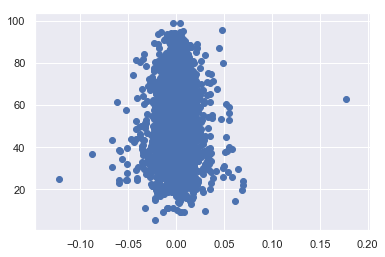

In [23]:
# Look at linear relationship between dependent and independent
plt.scatter(data['Return'],data['RSI'])  

In [24]:
data[data['Volume']>0].index

Int64Index([1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296,
            ...
            3013, 3014, 3015, 3016, 3018, 3019, 3020, 3021, 3022, 3023],
           dtype='int64', length=1722)

In [25]:
# Check correlation between independent vars
data.loc[1300:,['EWMARet','Volume','RSI']].corr()  

EWMARet    Volume       RSI
EWMARet  1.000000  0.009618  0.160859
Volume   0.009618  1.000000  0.006213
RSI      0.160859  0.006213  1.000000

In [26]:
test_start_index = data[data['Date']=="2019-01-02"].index.values[0]
print(test_start_index)

2742


In [27]:
data.loc[2740:2745]

index        Date         Close    Return          EWMA   EWMARet  \
2740   2755  2018-12-28  10859.900391  0.007431  10819.889073  0.002786   
2741   2756  2018-12-31  10862.549805  0.000244  10845.485512  0.005578   
2742   2757  2019-01-02  10792.500000 -0.006449  10813.694205  0.002366   
2743   2758  2019-01-03  10672.250000 -0.011142  10728.827682 -0.002931   
2744   2759  2019-01-04  10727.349609  0.005163  10727.940838 -0.007848   
2745   2760  2019-01-07  10771.799805  0.004144  10754.256218 -0.000083   

        Volume         OBV        RSI  
2740  456100.0  15895600.0  48.616488  
2741  245500.0  16076500.0  57.432317  
2742  180900.0  15766800.0  57.738321  
2743  309700.0  15480600.0  68.565379  
2744  286200.0  15777200.0  61.220073  
2745  296600.0  16046600.0  46.464120

In [28]:
# Split data in training, CV and test set
#X = data[['EWMARet','Volume','RSI']][1290:]    # taking from point where volume data is present
#Y = data['Return'][1290:]

X = data[['EWMARet','RSI']]  
Y = data['Return']

X_test = X.loc[test_start_index:]
Y_test = Y.loc[test_start_index:]

from sklearn.model_selection import train_test_split
X_train, X_CV, Y_train, Y_CV = train_test_split(X.loc[:test_start_index-1], Y.loc[:test_start_index-1], test_size=0.30, shuffle=False)

In [30]:
# Perform linear reg on training set. Check in CV set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
print("R-square on training set= ", reg.score(X_train,Y_train))

Y_predict_CV = reg.predict(X_CV)
print("R-square on CV set= ", reg.score(X_CV,Y_CV))

R-square on training set=  0.0022530875144052276
R-square on CV set=  0.0020998173289327182


In [31]:
X_train_end = X_train.iloc[-1:].index[0]
print(X_train_end)

1918


Text(0.5,1,'Predicted vs. Original in Cross Validation set')

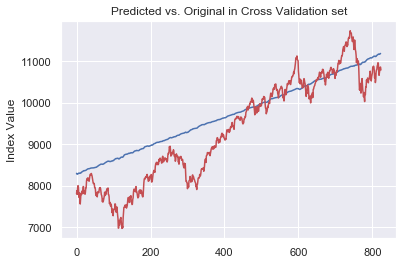

In [32]:
# Plotting the predicted and original series in CV set
InitPrice = data.loc[X_train_end,'Close']
computedCloseCV = [0]*(len(Y_predict_CV))
for i in range(0,len(Y_predict_CV)):
    if(i==0):
        computedCloseCV[i] = InitPrice*(1+Y_predict_CV[i])
    else:
        computedCloseCV[i] = computedCloseCV[i-1]*(1+Y_predict_CV[i])
        
plt.plot(computedCloseCV)
original = data.loc[X_train_end+1:test_start_index,'Close']
plt.plot(data.loc[X_train_end+1:test_start_index,'Close'].values,'r')
plt.ylabel("Index Value")
plt.title("Predicted vs. Original in Cross Validation set")

In [33]:
# Compute RMSE on CV set (on returns)
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_CV, Y_predict_CV))
# 0.008315411498910335

0.008315411498910335

In [34]:
# Compute RMSE on test set (on returns)
Y_predict_test = reg.predict(X_test)
np.sqrt(mean_squared_error(Y_test, Y_predict_test))
# 0.008783660005269197

0.008783660005269197

In [35]:
# Computing price from predicted returns

InitPrice = data.loc[test_start_index-1,'Close']
computedClose = [0]*(len(Y_predict_test))
for i in range(0,len(Y_predict_test)):
    if(i==0):
        computedClose[i] = InitPrice*(1+Y_predict_test[i])
    else:
        computedClose[i] = computedClose[i-1]*(1+Y_predict_test[i])

In [36]:
# RMSE of prices
np.sqrt(mean_squared_error(data.loc[test_start_index:,'Close'], computedClose))
# 362.2210589946756

362.2210589946756

Text(0.5,1,'Predicted vs. Original in test set')

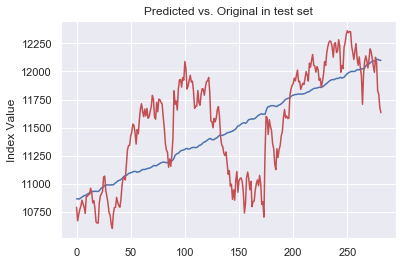

In [37]:
plt.plot(computedClose)
original = data.loc[test_start_index:,'Close']
plt.plot(data.loc[test_start_index:,'Close'].values,'r')
plt.ylabel("Index Value")
plt.title("Predicted vs. Original in test set")